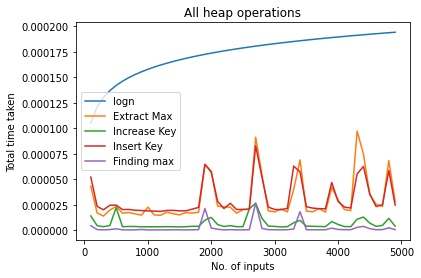

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time , random

#Heapify
def Heapify(Arr,i,Arr_len2):
    left_child = 2 * i + 1  #leftChild child
    right_child = 2 * i + 2 #rightChild child
    if left_child < Arr_len2 and Arr[left_child] > Arr[i]:
        largest = left_child
    else:
        largest = i
    if right_child < Arr_len2 and Arr[right_child] >=Arr[largest]:
        largest = right_child
    if largest != i:
        Arr[i], Arr[largest] = Arr[largest], Arr[i]
        Heapify(Arr, largest,Arr_len2)

#Build heap
def BuildHeap(Arr):
    for i in range(int((len(Arr)/2)-1), -1, -1):
        Heapify(Arr,i,len(Arr))

#finding Maximum Element
def FindingMax(arr):
    return arr[0]

#Extracting max element
def extractMax2(Arr):
    len_Arr=len(Arr)
    if len_Arr<1:
        return -1
    elif len_Arr==1:
        return Arr[0]
    else:
        max_element=Arr[0]
        Arr[0]=Arr[len(Arr)-1]
        lst=np.delete(Arr,len(Arr)-1)
        Heapify(Arr,0,len(Arr))
        return max_element

def increaseKey(Arr,i,key):
    if Arr[i]>key:
        return -1
    Arr[i]=key
    while (i>0 and Arr[(i)//2]<Arr[i]):
        Arr[i],Arr[(i)//2]=Arr[(i)//2],Arr[i]
        idx=i//2

def insert(Arr,key):
    Arr=np.insert(Arr,-1,len(Arr)+1)
    increaseKey(Arr,len(Arr)-1,key)
    

if __name__ == "__main__":
    time_extract_max=[]
    time_increase_key=[]
    time_insert_key=[]
    time_finding_max=[]
    randarr_len=[]
    for i in range(1,50):
        randarr=np.random.randint(1,20,i*100)
        randarr_len.append(len(randarr))
        BuildHeap(randarr)

        st_timer1=time.perf_counter()
        largest=FindingMax(randarr)
        time_finding_max.append((time.perf_counter()-st_timer1))
        
        st_timer2=time.perf_counter()
        extractMax2(randarr)
        time_extract_max.append(((time.perf_counter()-st_timer2)))
        
        st_timer3=time.perf_counter()
        increaseKey(randarr,random.randint(10,20),random.randint(40,50))
        time_increase_key.append((time.perf_counter()-st_timer3))

        st_timer4=time.perf_counter()
        insert(randarr,random.randint(40,60))
        time_insert_key.append((time.perf_counter()-st_timer4))

    logn=[(np.log2(i)/10**4.8) for i in randarr_len] #logn

    # print(lst_len2)
    # print(logn)
    plt.plot(randarr_len,logn,label="logn")
    plt.plot(randarr_len,time_extract_max,label="Extract Max")
    plt.plot(randarr_len,time_increase_key,label="Increase Key")
    plt.plot(randarr_len,time_insert_key,label="Insert Key")
    plt.plot(randarr_len,time_finding_max,label="Finding max")

    plt.title("All heap operations")
    plt.xlabel("No. of inputs")
    plt.ylabel("Total time taken")
    plt.rcParams["figure.figsize"] = (10,6)
    plt.legend()
    plt.show()

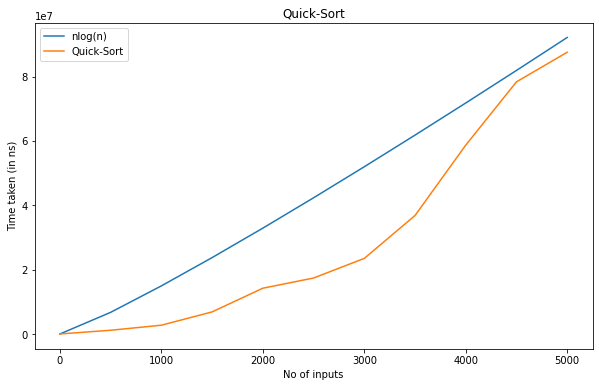

In [35]:
 
import math
import time
import matplotlib.pyplot as plt
import random

# Function to find the partition position
def partition(array, low, high):
  
  # Choose the rightmost element as pivot
  pivot = array[high]
  
  # Pointer for greater element
  i = low - 1
  
  # Traverse through all elements
  # compare each element with pivot
  for j in range(low, high):
    if array[j] <= pivot:
      # If element smaller than pivot is found
      # swap it with the greater element pointed by i
      i = i + 1
  
      # Swapping element at i with element at j
      (array[i], array[j]) = (array[j], array[i])
  
  # Swap the pivot element with the greater element specified by i
  (array[i + 1], array[high]) = (array[high], array[i + 1])
  
  # Return the position from where partition is done
  return i + 1

# Function to perform quicksort
def quick_sort(array, low, high):
  if low < high:
  
    # Find pivot element such that
    # element smaller than pivot are on the left
    # element greater than pivot are on the right
    pi = partition(array, low, high)
  
    # Recursive call on the left of pivot
    quick_sort(array, low, pi - 1)
  
    # Recursive call on the right of pivot
    quick_sort(array, pi + 1, high)
  
    
if __name__ == '__main__': 
    arr = []
    exe_mer = []
    c = []    
    for j in range(0,11): 
        
        with open('input.txt','w') as f:
            for i in range(0,j*500):
                f.write(str(random.randint(i,1000*i))) 
                f.write("\n")
        
        with open('input.txt','r') as f:
            content = f.readlines()
        
        count = 0

        for val in content:
            arr.append(int(val)) 
            count += 1 
        
        start = time.time_ns()
        quick_sort(arr,0,len(arr)-1)
        end = time.time_ns()
        
        c.append(count)
        exe_mer.append((end - start))
     
    
    l = [(math.log2(x+1)*x)*1500 for x in c]
    plt.plot(c,l)
    plt.plot(c,exe_mer)


    plt.xlabel('No of inputs')
    plt.ylabel('Time taken (in ns)')
    plt.legend(["nlog(n)","Quick-Sort"])
    plt.title("Quick-Sort")
    plt.show()


In [4]:
arr = [8,2,6,10,11,1]
print([0] * max(arr))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


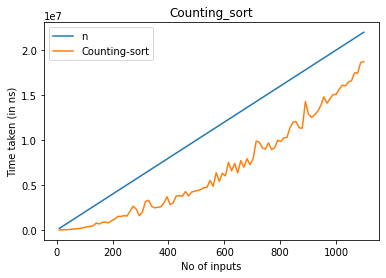

In [104]:

import time
import matplotlib.pyplot as plt
import random

def countingSort(array):
    size = len(array)
    output = [0] * size
    mx = max(array) + 1
    count = [0] * mx
    # print(f"{mx} ->max and {size} ->size")

    for i in range(0, size):
        count[array[i]] += 1

    # Store the cummulative count
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Find the index of each element of the original array in count array
    # place the elements in output array
    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1

    # Copy the sorted elements into original array
    for i in range(0, size):
        array[i] = output[i]

if __name__ == '__main__': 
    array = []
    exe_mer = []
    c = []    
    for j in range(1,11): 
        
        with open('input.txt','w') as f:
            for i in range(1,j*101):
                f.write(str(random.randint(8*i,10*i))) 
                f.write("\n")
        
        with open('input.txt','r') as f:
            content = f.readlines()
        
        count = 0

        for val in content:
            array.append(int(val)) 
            count += 1 
        
        start = time.perf_counter_ns()
        countingSort(array)
        end = time.perf_counter_ns()
        
        c.append(count)
        exe_mer.append((end - start))
     
    
    l = [x*20000 for x in c]
    plt.plot(c,l)
    plt.plot(c,exe_mer)
    plt.xlabel('No of inputs')
    plt.ylabel('Time taken (in ns)')
    plt.legend(["n","Counting-sort"])
    plt.title("Counting_sort")
    plt.show()




# data = [4, 2, 2, 8, 3, 3, 1]
# countingSort(data)
# print("Sorted Array in Ascending Order: ")
# print(data)
